# CNN


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data


In [2]:
(X_train, y_train), (X_test, y_test) = load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


In [6]:
# 10000/50000 images, 32x32 for each image with 3 color channels (rgb)
X_test.shape, X_train.shape

((10000, 32, 32, 3), (50000, 32, 32, 3))

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
# ravel tar bort en dimenstion
y_train, y_test = y_train.ravel(), y_test.ravel()

In [11]:
# 50000, istället för 50000,1
y_train.shape

(50000,)

In [12]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}
labels_dict


{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

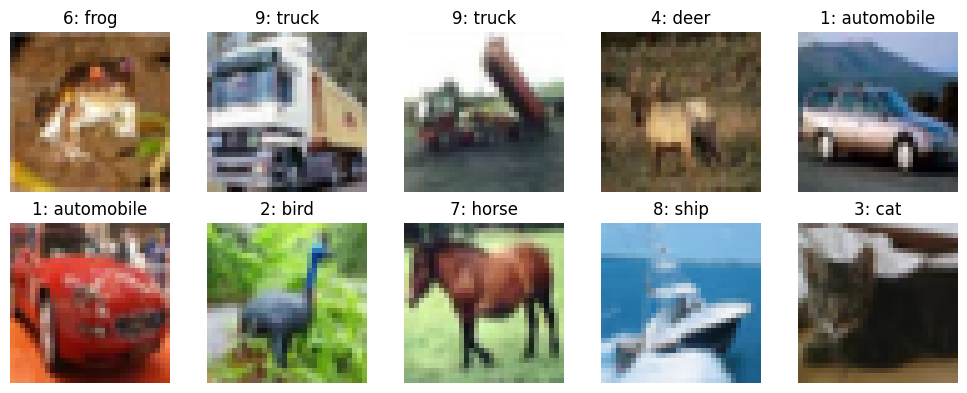

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()

In [16]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255
scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

### CNN Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:


def CNN_model(learning_rate=0.001, drop_rate=0.5, kernels=[32, 64]):
    # optimizer som används för lärande
    adam = Adam(learning_rate=learning_rate)
    
    model = Sequential(name="CNN_model")
    
    #convulutional och subsamplings layers
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, # antal kernels i varje lager
            kernel_size=(3, 3),
            activation="relu", # Bra början
            kernel_initializer="he_normal", # initierar weights bra att använda med relu
            input_shape=X_train.shape[1:], # detta ger 32x32x3
        )
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size=(2,2), strides=2 ))
    
    # MLP delen
    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(256, activation= "relu", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer= adam, metrics= ["acc"])
    
    return model

model = CNN_model(.001, .5, [32, 64, 32])

model.summary()
    
    
    
        
    


c:\Users\utjis\OneDrive - Handelsakademin\AI-Github\AI-Richard-Boden-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# want to minimize monitored metric (val_loss)
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 / 5,
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.2542 - loss: 1.9784 - val_acc: 0.4747 - val_loss: 1.4350
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.4407 - loss: 1.5058 - val_acc: 0.5309 - val_loss: 1.2890
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.5003 - loss: 1.3686 - val_acc: 0.5555 - val_loss: 1.2369
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.5366 - loss: 1.2767 - val_acc: 0.6059 - val_loss: 1.1229
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.5580 - loss: 1.2175 - val_acc: 0.6262 - val_loss: 1.0678
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.5831 - loss: 1.1591 - val_acc: 0.6311 - val_loss: 1.0540
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.5895 - loss: 1.1305 - val_acc: 0.6491 - val_loss: 1.0047
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.6097 - loss: 1.0858 - val_acc: 0.6484 - val_loss: 1.0115
Epoch 9/100
1250/1250 ━━━━━━━━━━

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics.head(10)

,acc,loss,val_acc,val_loss
0,0.329625,1.789424,0.4747,1.434982
1,0.458025,1.470792,0.5309,1.289037
2,0.508075,1.352259,0.5555,1.236915
3,0.539675,1.272964,0.6059,1.122891
4,0.561950,1.210333,0.6262,1.067783
5,0.580800,1.160912,0.6311,1.053985
6,0.594900,1.122533,0.6491,1.004658
7,0.610700,1.087430,0.6484,1.011454
8,0.622375,1.055460,0.6390,1.021861
9,0.633200,1.024783,0.6715,0.940443


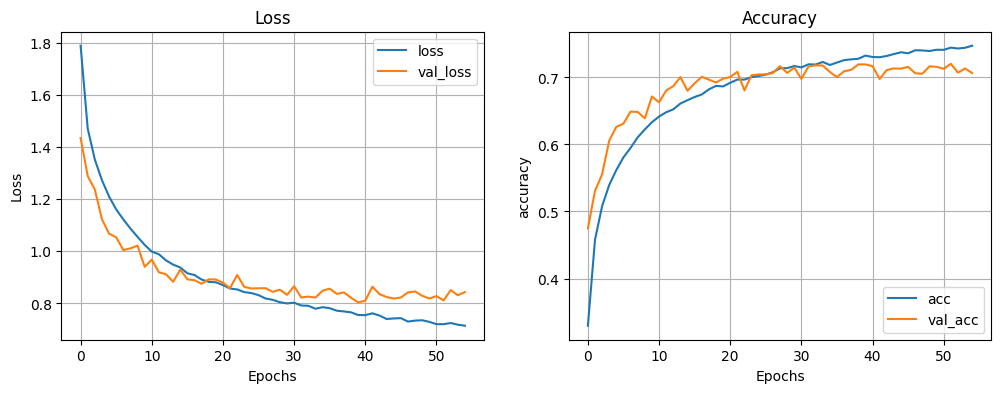

In [24]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel= "Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel = "accuracy")

plot_metrics(metrics)

## Hyperparameter tuning

we can tune several parameters, e.g.

- dropout rate
- learning rate
- different network configurations

For simplicity we only tune dropout rate here

In [25]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=3, restore_best_weights=True)


def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(
        scaled_X_train,
        y_train,
        validation_split=1 / 5,
        epochs=10,  # small epochs to make training faster
        callbacks=[early_stopper],
    )
    metrics = pd.DataFrame(model.history.history)
    # hämtar sista epoch validation accuracy
    val_acc = metrics["val_acc"].iloc[-1]
    return val_acc

In [26]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    # because of floating point precision
    drop_rate = np.round(drop_rate,1) 
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)

c:\Users\utjis\OneDrive - Handelsakademin\AI-Github\AI-Richard-Boden-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - acc: 0.3957 - loss: 1.6727 - val_acc: 0.5775 - val_loss: 1.2121
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.6058 - loss: 1.1142 - val_acc: 0.6376 - val_loss: 1.0355
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.6779 - loss: 0.9169 - val_acc: 0.6566 - val_loss: 0.9759
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7319 - loss: 0.7673 - val_acc: 0.6784 - val_loss: 0.9359
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7788 - loss: 0.6323 - val_acc: 0.6977 - val_loss: 0.9153
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.8260 - loss: 0.5016 - val_acc: 0.6946 - val_loss: 0.9497
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.8621 - loss: 0.4003 - val_acc: 0.6923 - val_loss: 1.0132
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.8873 - loss: 0.3234 - val_acc: 0.7025 - val_loss: 1.0465
Epoch 1/10
1250/1250 ━━━━━━━━━━━

In [ ]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)